              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3550
           1       0.93      0.97      0.95      3648

    accuracy                           0.95      7198
   macro avg       0.95      0.95      0.95      7198
weighted avg       0.95      0.95      0.95      7198



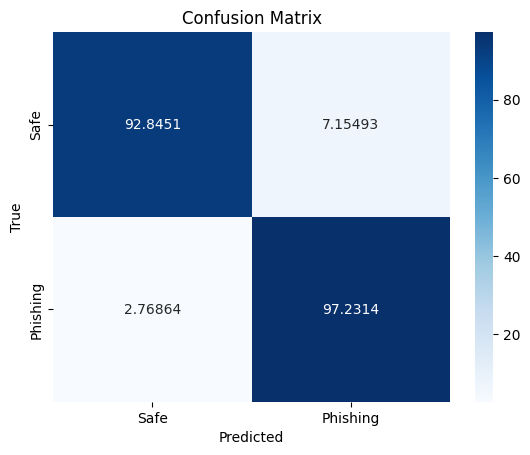

Accuracy: 0.94 (+/- 0.02)


In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load CSV file containing URLs
data = pd.read_csv('dataset/dataset.csv',encoding= 'unicode_escape')
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Url'])
y = np.array(data['Label'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Train random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores = cross_val_score(model, X, y, cv=5)

# Calculate the performance metrics and display them
report = classification_report(y_test, y_pred)
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test,y_pred, normalize='true')

# Plot the confusion matrix using Seaborn heatmap
sns.heatmap(cm*100, annot=True, cmap='Blues', fmt='g', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Print the Accuracy
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
